In [3]:
import numpy as np
import pandas as pd
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import argparse
plt.rcParams.update({'font.size': 14})

In [18]:
suicides = pd.read_csv('/home/alec/Downloads/master.csv')

In [19]:
suicides.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [20]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [21]:
a = suicides.country.unique()
a.shape

(101,)

In [22]:
a

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [7]:
df1 = pd.read_csv('/home/alec/Downloads/2015.csv')

In [9]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [23]:
suicides.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [43]:
mask_1 = suicides['age'] == '35-54 years'
mask_2 = suicides['sex'] == 'male'
mask_3 = suicides['country'] == 'Albania'
mask_4 = mask_1 & mask_2 & mask_3
suicides1 = suicides[mask_4]
suicides1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
15,Albania,1988,male,35-54 years,14,314100,4.46,Albania1988,NaN,"2,126,000,000",769,Silent
26,Albania,1989,male,35-54 years,15,318400,4.71,Albania1989,NaN,"2,335,124,988",833,Silent
36,Albania,1992,male,35-54 years,12,343800,3.49,Albania1992,NaN,"709,452,584",251,Boomers
53,Albania,1993,male,35-54 years,10,350300,2.85,Albania1993,NaN,"1,228,071,038",437,Boomers
64,Albania,1994,male,35-54 years,9,362800,2.48,Albania1994,NaN,"1,985,673,798",697,Boomers
78,Albania,1995,male,35-54 years,14,375900,3.72,Albania1995,0.619,"2,424,499,009",835,Boomers
90,Albania,1996,male,35-54 years,12,379600,3.16,Albania1996,NaN,"3,314,898,292",1127,Boomers
99,Albania,1997,male,35-54 years,30,380800,7.88,Albania1997,NaN,"2,359,903,108",793,Boomers
112,Albania,1998,male,35-54 years,29,388200,7.47,Albania1998,NaN,"2,707,123,772",899,Boomers


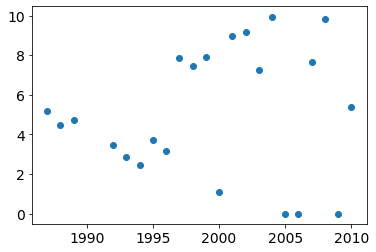

In [44]:
fig, ax = plt.subplots(1)
ax.scatter(suicides1['year'], suicides1['suicides/100k pop'])
plt.show()

In [35]:
mask_1 = suicides['age'] == '35-54 years'
mask_2 = suicides['sex'] == 'female'
mask_3 = suicides['country'] == 'Albania'
mask_4 = mask_1 & mask_2 & mask_3
suicides2 = suicides[mask_4]
suicides2

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
21,Albania,1988,female,35-54 years,4,284500,1.41,Albania1988,NaN,"2,126,000,000",769,Silent
29,Albania,1989,female,35-54 years,7,288600,2.43,Albania1989,NaN,"2,335,124,988",833,Silent
42,Albania,1992,female,35-54 years,2,323100,0.62,Albania1992,NaN,"709,452,584",251,Boomers
55,Albania,1993,female,35-54 years,7,331200,2.11,Albania1993,NaN,"1,228,071,038",437,Boomers
68,Albania,1994,female,35-54 years,2,342500,0.58,Albania1994,NaN,"1,985,673,798",697,Boomers
80,Albania,1995,female,35-54 years,8,356400,2.24,Albania1995,0.619,"2,424,499,009",835,Boomers
91,Albania,1996,female,35-54 years,9,362000,2.49,Albania1996,NaN,"3,314,898,292",1127,Boomers
104,Albania,1997,female,35-54 years,7,370100,1.89,Albania1997,NaN,"2,359,903,108",793,Boomers
116,Albania,1998,female,35-54 years,9,372100,2.42,Albania1998,NaN,"2,707,123,772",899,Boomers


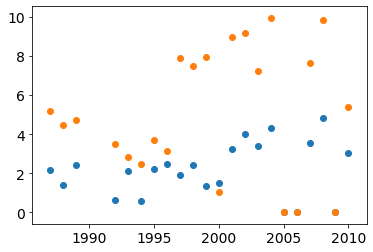

In [45]:
fig, ax = plt.subplots(1)
ax.scatter(suicides2['year'], suicides2['suicides/100k pop'])
ax.scatter(suicides1['year'], suicides1['suicides/100k pop'])
plt.show()

In [48]:
mask_a = suicides['age'] == '35-54 years'
mask_b = suicides['sex'] == 'male'
mask_c = suicides['country'] == 'United States'
mask_d = mask_a & mask_b & mask_c
suicidesa = suicides[mask_d]
suicidesa

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26863,United States,1986,male,35-54 years,6450,27363000,23.57,United States1986,NaN,"4,590,155,000,000",20588,Silent
26875,United States,1987,male,35-54 years,6569,28222000,23.28,United States1987,NaN,"4,870,217,000,000",21631,Silent
26887,United States,1988,male,35-54 years,6528,29147000,22.40,United States1988,NaN,"5,252,629,000,000",23103,Silent
26899,United States,1989,male,35-54 years,6814,30135000,22.61,United States1989,NaN,"5,657,693,000,000",24654,Silent
26911,United States,1990,male,35-54 years,7260,30742000,23.62,United States1990,0.859,"5,979,589,000,000",26004,Silent
26923,United States,1991,male,35-54 years,7454,31995000,23.30,United States1991,NaN,"6,174,043,000,000",26503,Boomers
26935,United States,1992,male,35-54 years,7679,33165400,23.15,United States1992,NaN,"6,539,299,000,000",27760,Boomers
26947,United States,1993,male,35-54 years,7976,34205000,23.32,United States1993,NaN,"6,878,718,000,000",28891,Boomers
26960,United States,1994,male,35-54 years,8199,35239700,23.27,United States1994,NaN,"7,308,755,000,000",30375,Boomers


In [52]:
mask_e = suicides['age'] == '35-54 years'
mask_f = suicides['sex'] == 'female'
mask_g = suicides['country'] == 'United States'
mask_h = mask_e & mask_f & mask_g
suicidesb = suicides[mask_h]
suicidesb

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,"4,346,734,000,000",19693,Silent
26865,United States,1986,female,35-54 years,2299,28520000,8.06,United States1986,NaN,"4,590,155,000,000",20588,Silent
26877,United States,1987,female,35-54 years,2270,29359000,7.73,United States1987,NaN,"4,870,217,000,000",21631,Silent
26889,United States,1988,female,35-54 years,2209,30281000,7.30,United States1988,NaN,"5,252,629,000,000",23103,Silent
26901,United States,1989,female,35-54 years,2159,31264000,6.91,United States1989,NaN,"5,657,693,000,000",24654,Silent
26914,United States,1990,female,35-54 years,2175,31749500,6.85,United States1990,0.859,"5,979,589,000,000",26004,Silent
26925,United States,1991,female,35-54 years,2296,33017000,6.95,United States1991,NaN,"6,174,043,000,000",26503,Boomers
26937,United States,1992,female,35-54 years,2348,34156600,6.87,United States1992,NaN,"6,539,299,000,000",27760,Boomers
26949,United States,1993,female,35-54 years,2362,35236400,6.70,United States1993,NaN,"6,878,718,000,000",28891,Boomers
26961,United States,1994,female,35-54 years,2472,36290200,6.81,United States1994,NaN,"7,308,755,000,000",30375,Boomers


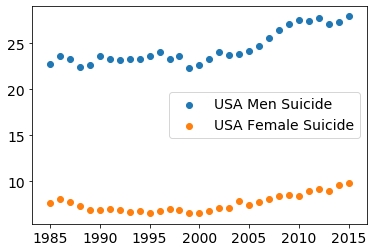

In [54]:
fig, ax = plt.subplots(1)
ax.scatter(suicidesa['year'], suicidesa['suicides/100k pop'], label='USA Men Suicide')
ax.scatter(suicidesb['year'], suicidesb['suicides/100k pop'], label='USA Female Suicide')
ax.legend()
plt.show()

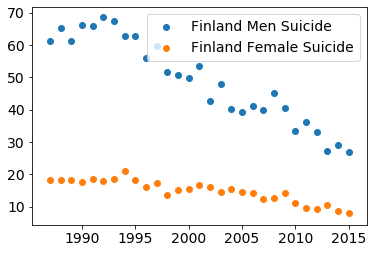

In [55]:
mask_a = suicides['age'] == '35-54 years'
mask_b = suicides['sex'] == 'male'
mask_c = suicides['country'] == 'Finland'
mask_d = mask_a & mask_b & mask_c
suicidesa = suicides[mask_d]
suicidesa

mask_e = suicides['age'] == '35-54 years'
mask_f = suicides['sex'] == 'female'
mask_g = suicides['country'] == 'Finland'
mask_h = mask_e & mask_f & mask_g
suicidesb = suicides[mask_h]
suicidesb

fig, ax = plt.subplots(1)
ax.scatter(suicidesa['year'], suicidesa['suicides/100k pop'], label='Finland Men Suicide')
ax.scatter(suicidesb['year'], suicidesb['suicides/100k pop'], label='Finland Female Suicide')
ax.legend()
plt.show()

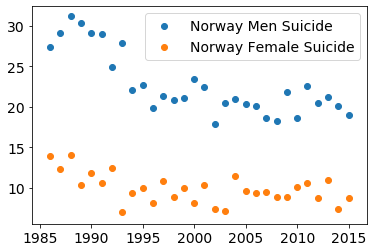

In [57]:
mask_a = suicides['age'] == '35-54 years'
mask_b = suicides['sex'] == 'male'
mask_c = suicides['country'] == 'Norway'
mask_d = mask_a & mask_b & mask_c
suicidesa = suicides[mask_d]
suicidesa

mask_e = suicides['age'] == '35-54 years'
mask_f = suicides['sex'] == 'female'
mask_g = suicides['country'] == 'Norway'
mask_h = mask_e & mask_f & mask_g
suicidesb = suicides[mask_h]
suicidesb

fig, ax = plt.subplots(1)
ax.scatter(suicidesa['year'], suicidesa['suicides/100k pop'], label='Norway Men Suicide')
ax.scatter(suicidesb['year'], suicidesb['suicides/100k pop'], label='Norway Female Suicide')
ax.legend()
plt.show()

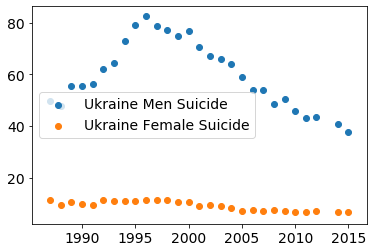

In [58]:
mask_a = suicides['age'] == '35-54 years'
mask_b = suicides['sex'] == 'male'
mask_c = suicides['country'] == 'Ukraine'
mask_d = mask_a & mask_b & mask_c
suicidesa = suicides[mask_d]
suicidesa

mask_e = suicides['age'] == '35-54 years'
mask_f = suicides['sex'] == 'female'
mask_g = suicides['country'] == 'Ukraine'
mask_h = mask_e & mask_f & mask_g
suicidesb = suicides[mask_h]
suicidesb

fig, ax = plt.subplots(1)
ax.scatter(suicidesa['year'], suicidesa['suicides/100k pop'], label='Ukraine Men Suicide')
ax.scatter(suicidesb['year'], suicidesb['suicides/100k pop'], label='Ukraine Female Suicide')
ax.legend()
plt.show()

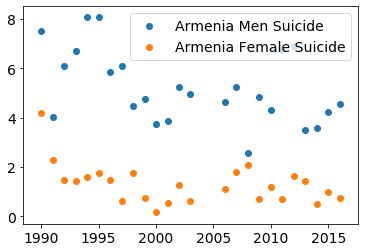

In [59]:
mask_a = suicides['age'] == '35-54 years'
mask_b = suicides['sex'] == 'male'
mask_c = suicides['country'] == 'Armenia'
mask_d = mask_a & mask_b & mask_c
suicidesa = suicides[mask_d]
suicidesa

mask_e = suicides['age'] == '35-54 years'
mask_f = suicides['sex'] == 'female'
mask_g = suicides['country'] == 'Armenia'
mask_h = mask_e & mask_f & mask_g
suicidesb = suicides[mask_h]
suicidesb

fig, ax = plt.subplots(1)
ax.scatter(suicidesa['year'], suicidesa['suicides/100k pop'], label='Armenia Men Suicide')
ax.scatter(suicidesb['year'], suicidesb['suicides/100k pop'], label='Armenia Female Suicide')
ax.legend()
plt.show()

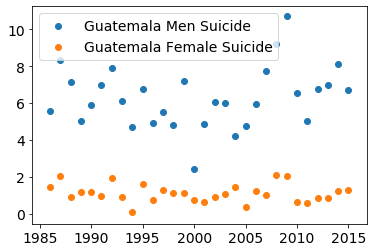

In [61]:
mask_a = suicides['age'] == '35-54 years'
mask_b = suicides['sex'] == 'male'
mask_c = suicides['country'] == 'Guatemala'
mask_d = mask_a & mask_b & mask_c
suicidesa = suicides[mask_d]
suicidesa

mask_e = suicides['age'] == '35-54 years'
mask_f = suicides['sex'] == 'female'
mask_g = suicides['country'] == 'Guatemala'
mask_h = mask_e & mask_f & mask_g
suicidesb = suicides[mask_h]
suicidesb

fig, ax = plt.subplots(1)
ax.scatter(suicidesa['year'], suicidesa['suicides/100k pop'], label='Guatemala Men Suicide')
ax.scatter(suicidesb['year'], suicidesb['suicides/100k pop'], label='Guatemala Female Suicide')
ax.legend()
plt.show()

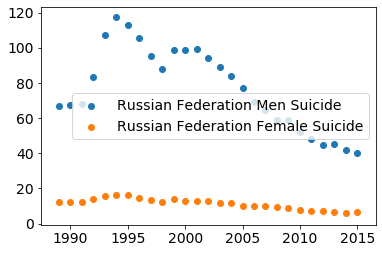

In [62]:
mask_a = suicides['age'] == '35-54 years'
mask_b = suicides['sex'] == 'male'
mask_c = suicides['country'] == 'Russian Federation'
mask_d = mask_a & mask_b & mask_c
suicidesa = suicides[mask_d]
suicidesa

mask_e = suicides['age'] == '35-54 years'
mask_f = suicides['sex'] == 'female'
mask_g = suicides['country'] == 'Russian Federation'
mask_h = mask_e & mask_f & mask_g
suicidesb = suicides[mask_h]
suicidesb

fig, ax = plt.subplots(1)
ax.scatter(suicidesa['year'], suicidesa['suicides/100k pop'], label='Russian Federation Men Suicide')
ax.scatter(suicidesb['year'], suicidesb['suicides/100k pop'], label='Russian Federation Female Suicide')
ax.legend()
plt.show()